Connexion établie:
                               now  \
0 2025-12-18 13:49:07.590430+00:00   

                                             version  
0  PostgreSQL 17.7 (bdc8956) on aarch64-unknown-l...  

Top 10 pays par PIB en 2020:
  country_name iso_code          gdp
         China      CHN 2.415184e+13
 United States      USA 1.802736e+13
         India      IND 8.945313e+12
         Japan      JPN 4.626661e+12
       Germany      DEU 3.742721e+12
        Russia      RUS 3.606717e+12
     Indonesia      IDN 3.204973e+12
        Brazil      BRA 2.950377e+12
        France      FRA 2.438594e+12
United Kingdom      GBR 2.334804e+12

GÉNÉRATION DES PROJECTIONS PIB 2020-2050
avec validation train/test

Pays: China (CHN)


/tmp/ipykernel_58782/402316766.py:541: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


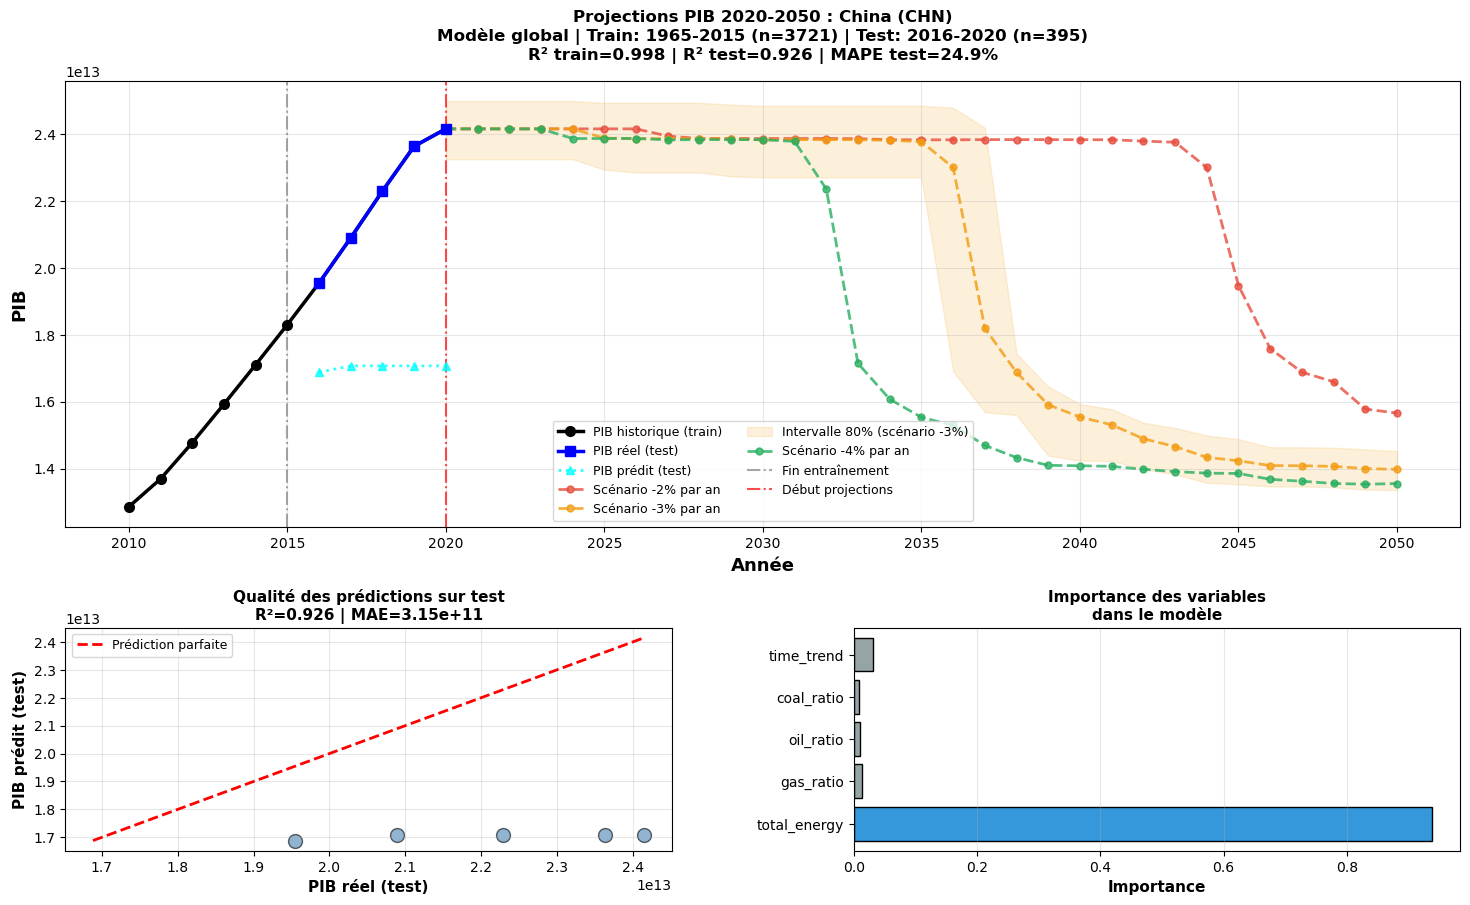

✓ Modèle global
  Train: 3721 observations (1965-2015)
  Test:  395 observations (2016-2020)
  R² train: 0.998
  R² test:  0.926
  MAE test: 3.15e+11
  MAPE test: 24.9%

Pays: United States (USA)


/tmp/ipykernel_58782/402316766.py:541: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


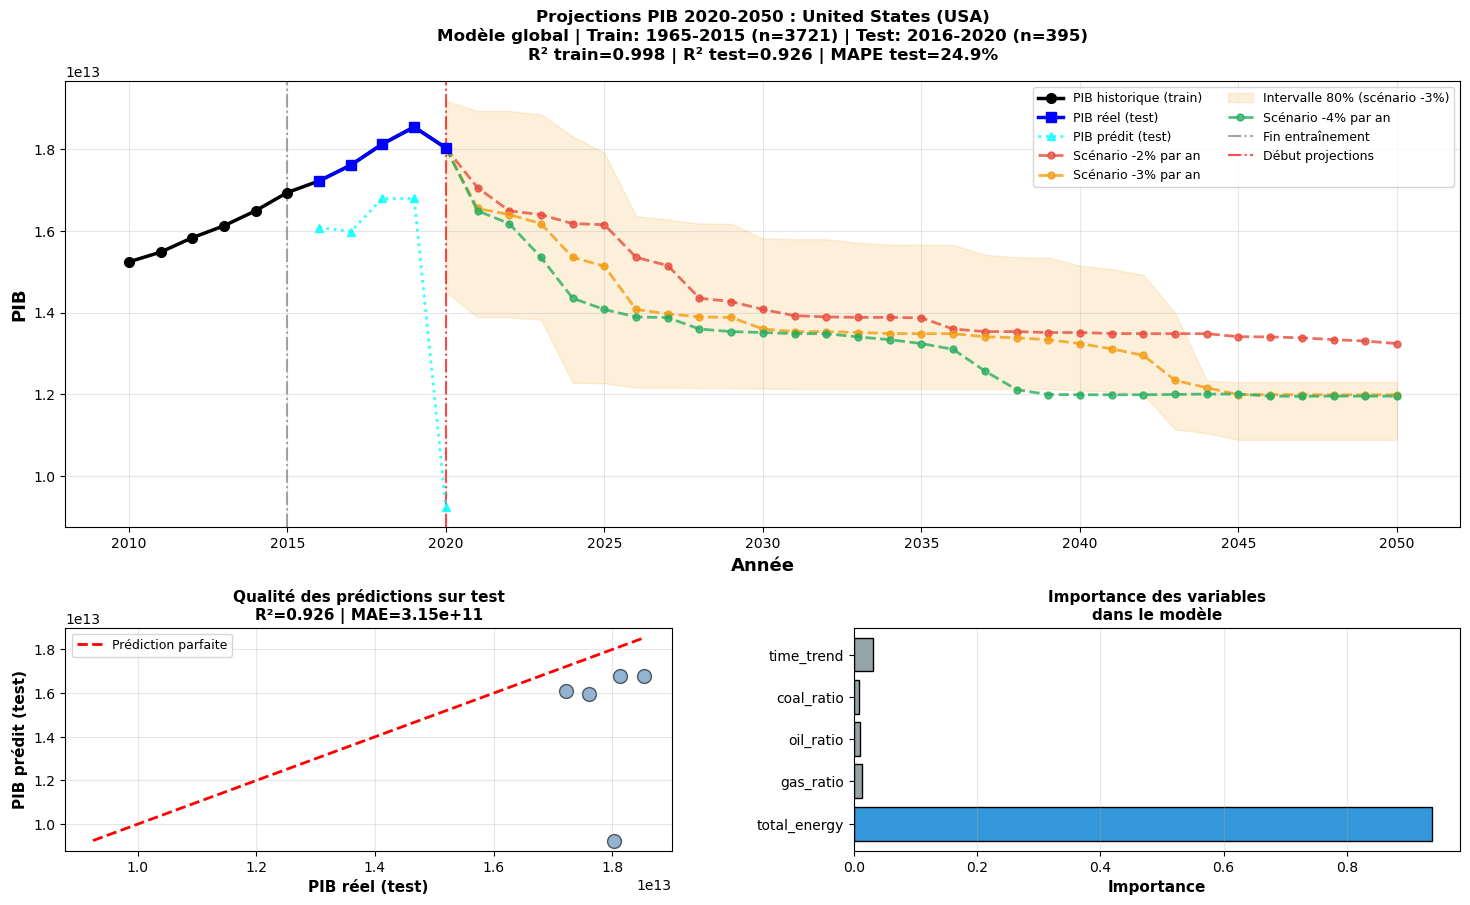

✓ Modèle global
  Train: 3721 observations (1965-2015)
  Test:  395 observations (2016-2020)
  R² train: 0.998
  R² test:  0.926
  MAE test: 3.15e+11
  MAPE test: 24.9%

Pays: India (IND)


/tmp/ipykernel_58782/402316766.py:541: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


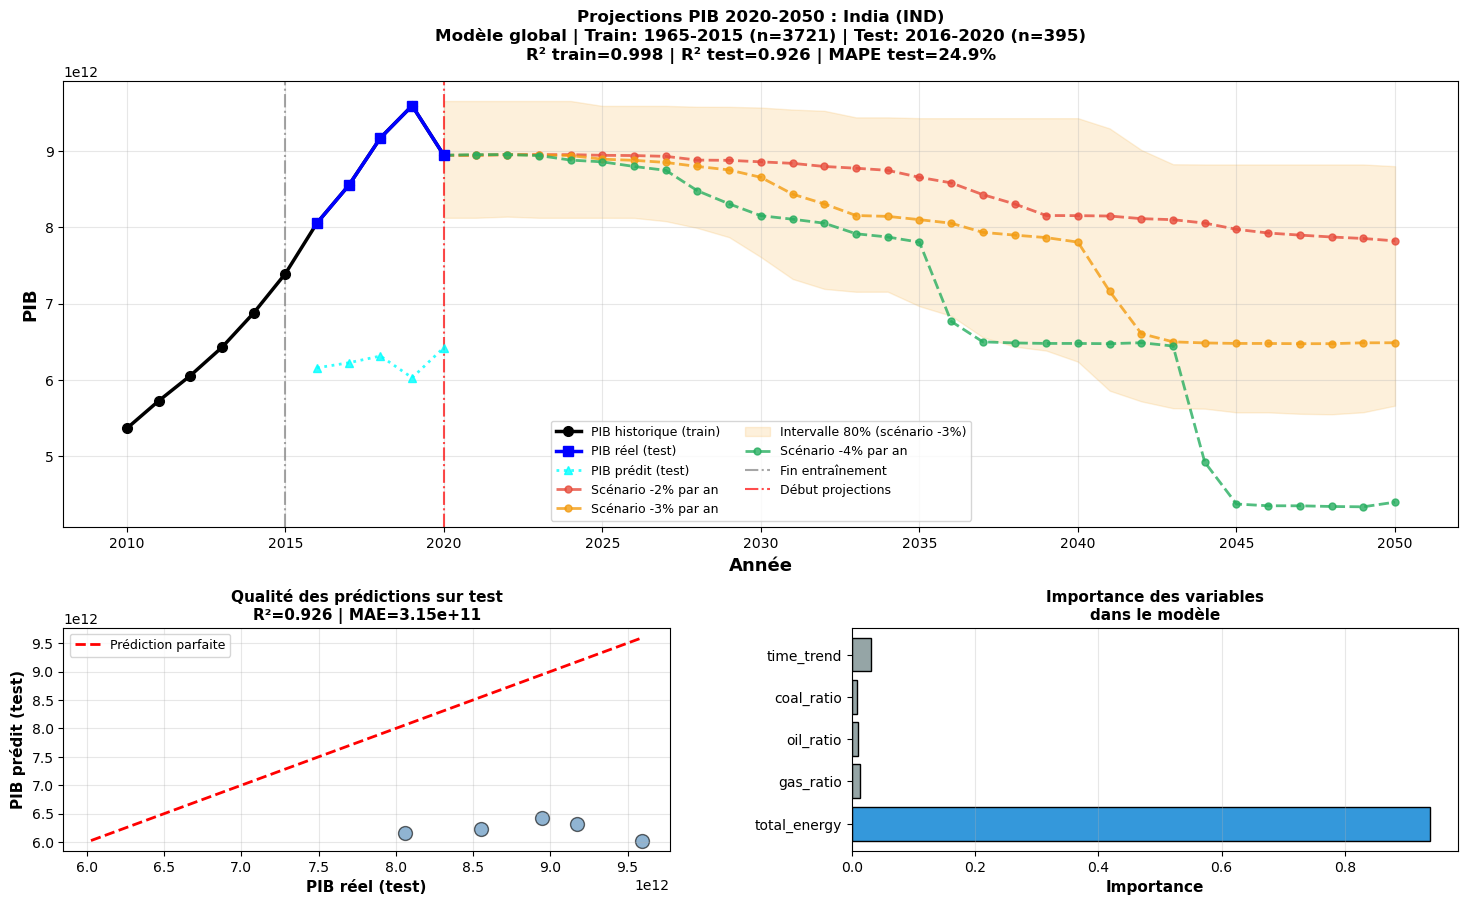

✓ Modèle global
  Train: 3721 observations (1965-2015)
  Test:  395 observations (2016-2020)
  R² train: 0.998
  R² test:  0.926
  MAE test: 3.15e+11
  MAPE test: 24.9%

Pays: Japan (JPN)


/tmp/ipykernel_58782/402316766.py:541: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


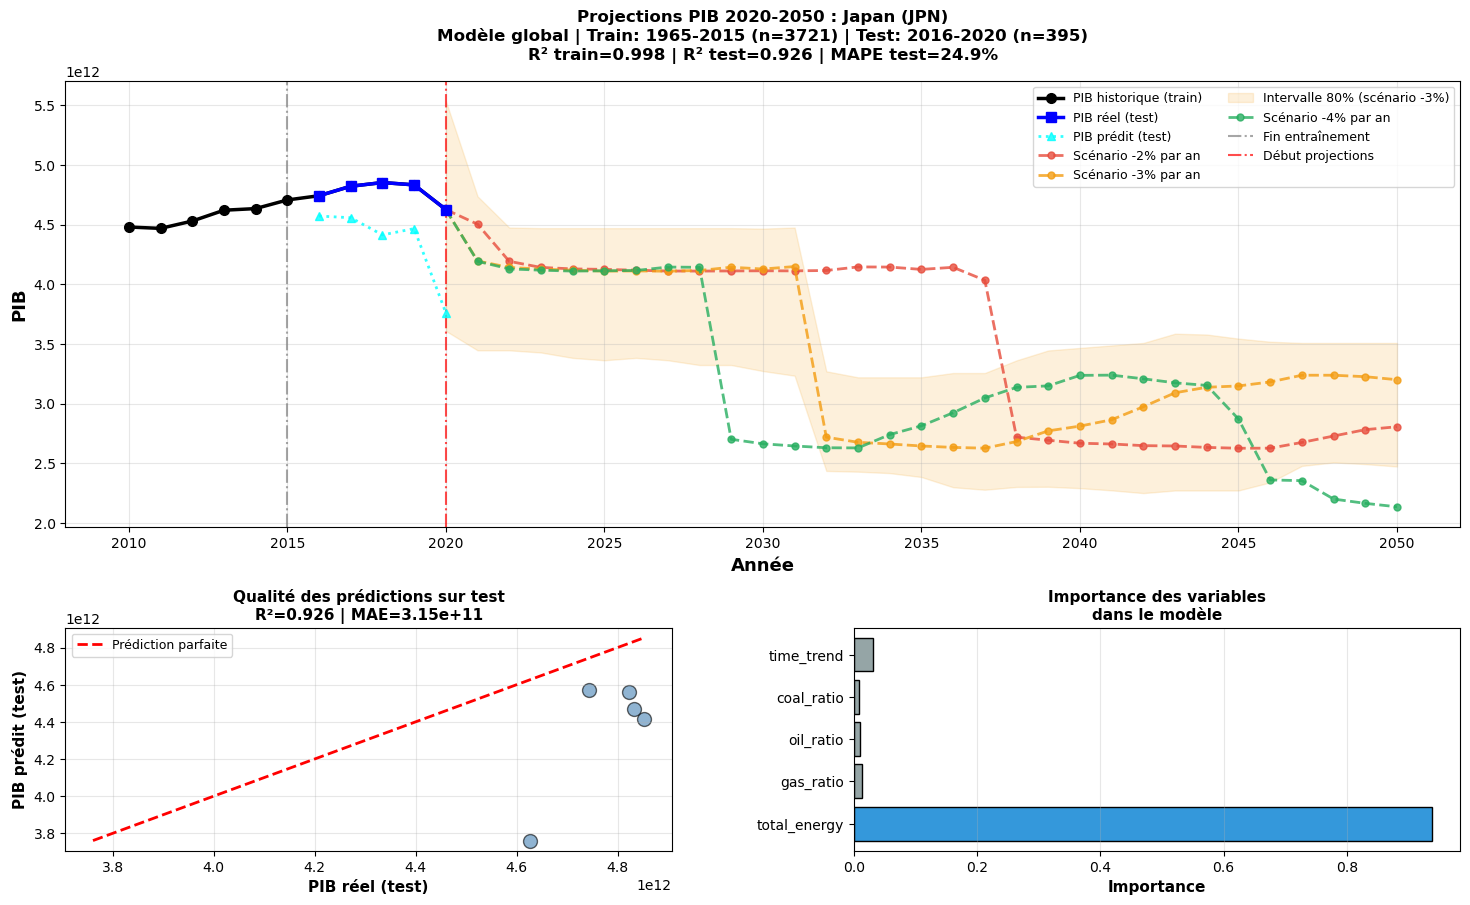

✓ Modèle global
  Train: 3721 observations (1965-2015)
  Test:  395 observations (2016-2020)
  R² train: 0.998
  R² test:  0.926
  MAE test: 3.15e+11
  MAPE test: 24.9%

Pays: Germany (DEU)


/tmp/ipykernel_58782/402316766.py:541: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


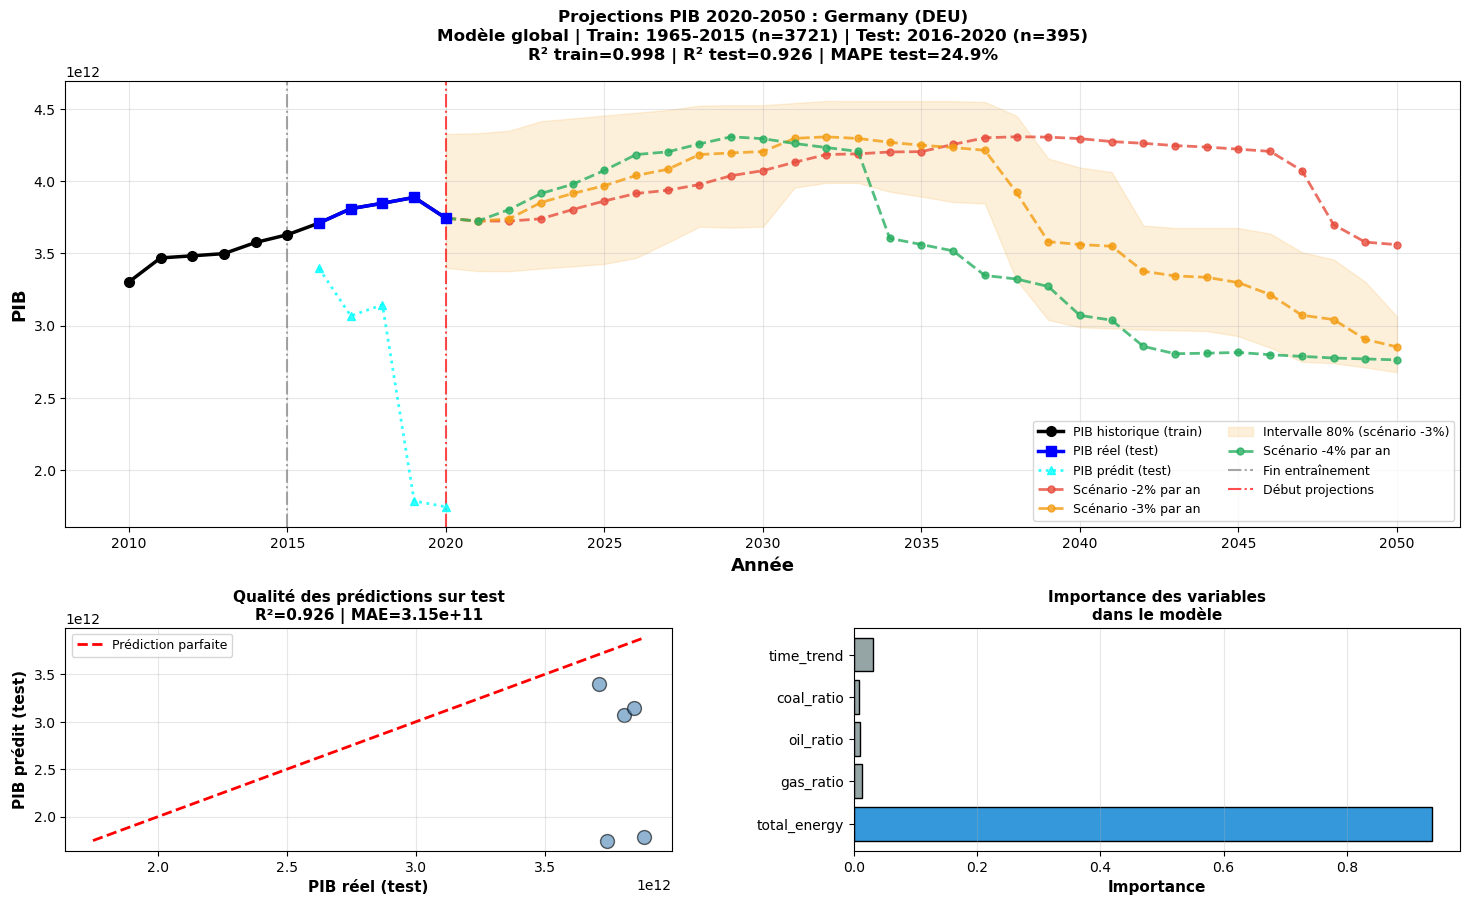

✓ Modèle global
  Train: 3721 observations (1965-2015)
  Test:  395 observations (2016-2020)
  R² train: 0.998
  R² test:  0.926
  MAE test: 3.15e+11
  MAPE test: 24.9%

Pays: Russia (RUS)


/tmp/ipykernel_58782/402316766.py:541: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


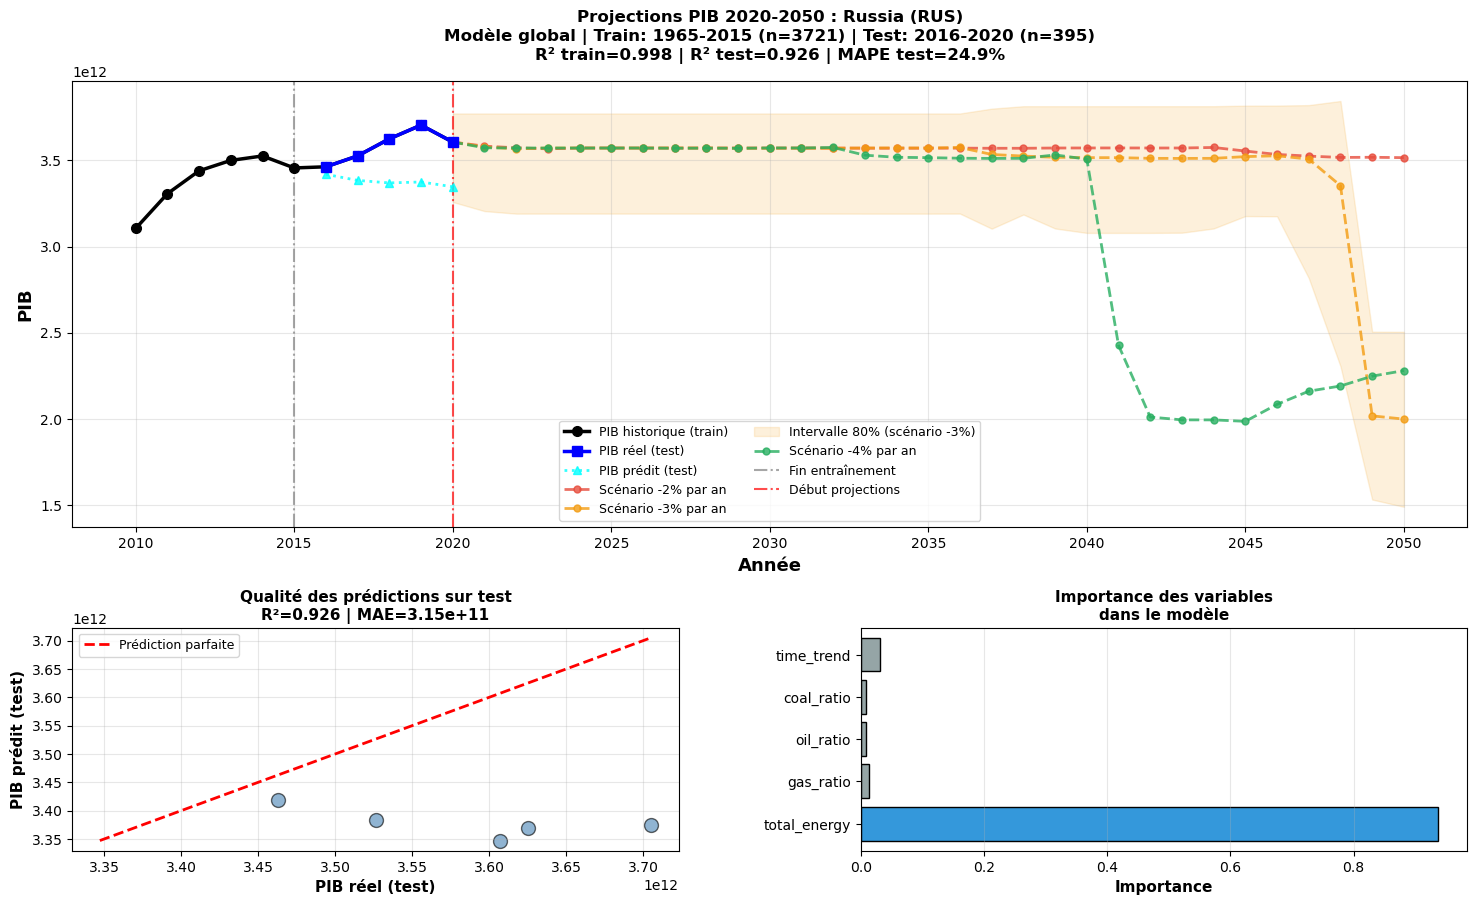

✓ Modèle global
  Train: 3721 observations (1965-2015)
  Test:  395 observations (2016-2020)
  R² train: 0.998
  R² test:  0.926
  MAE test: 3.15e+11
  MAPE test: 24.9%

Pays: Indonesia (IDN)


/tmp/ipykernel_58782/402316766.py:541: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


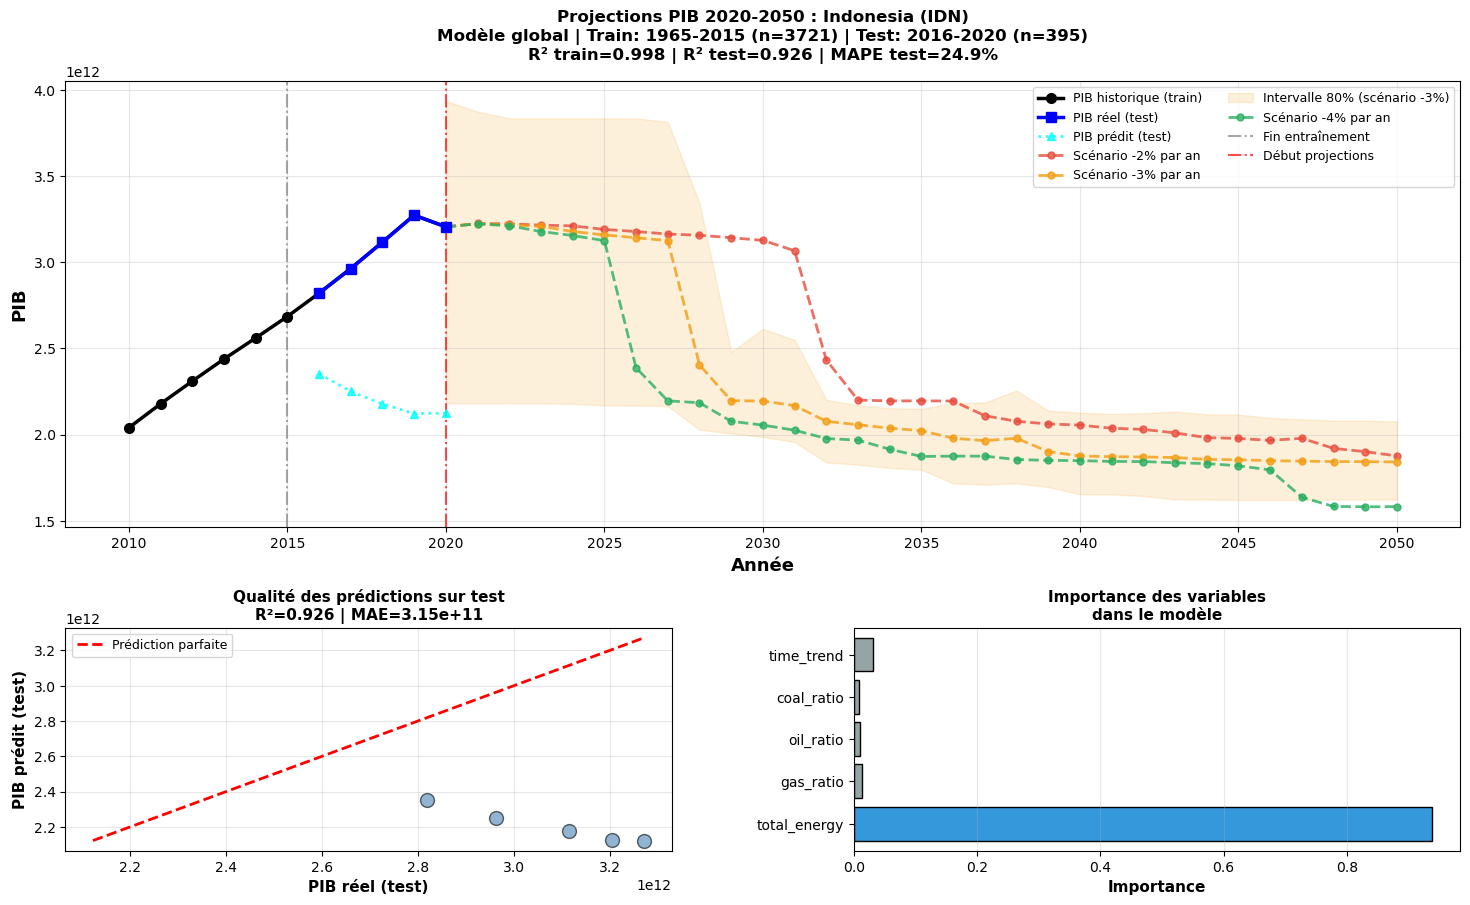

✓ Modèle global
  Train: 3721 observations (1965-2015)
  Test:  395 observations (2016-2020)
  R² train: 0.998
  R² test:  0.926
  MAE test: 3.15e+11
  MAPE test: 24.9%

Pays: Brazil (BRA)


/tmp/ipykernel_58782/402316766.py:541: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


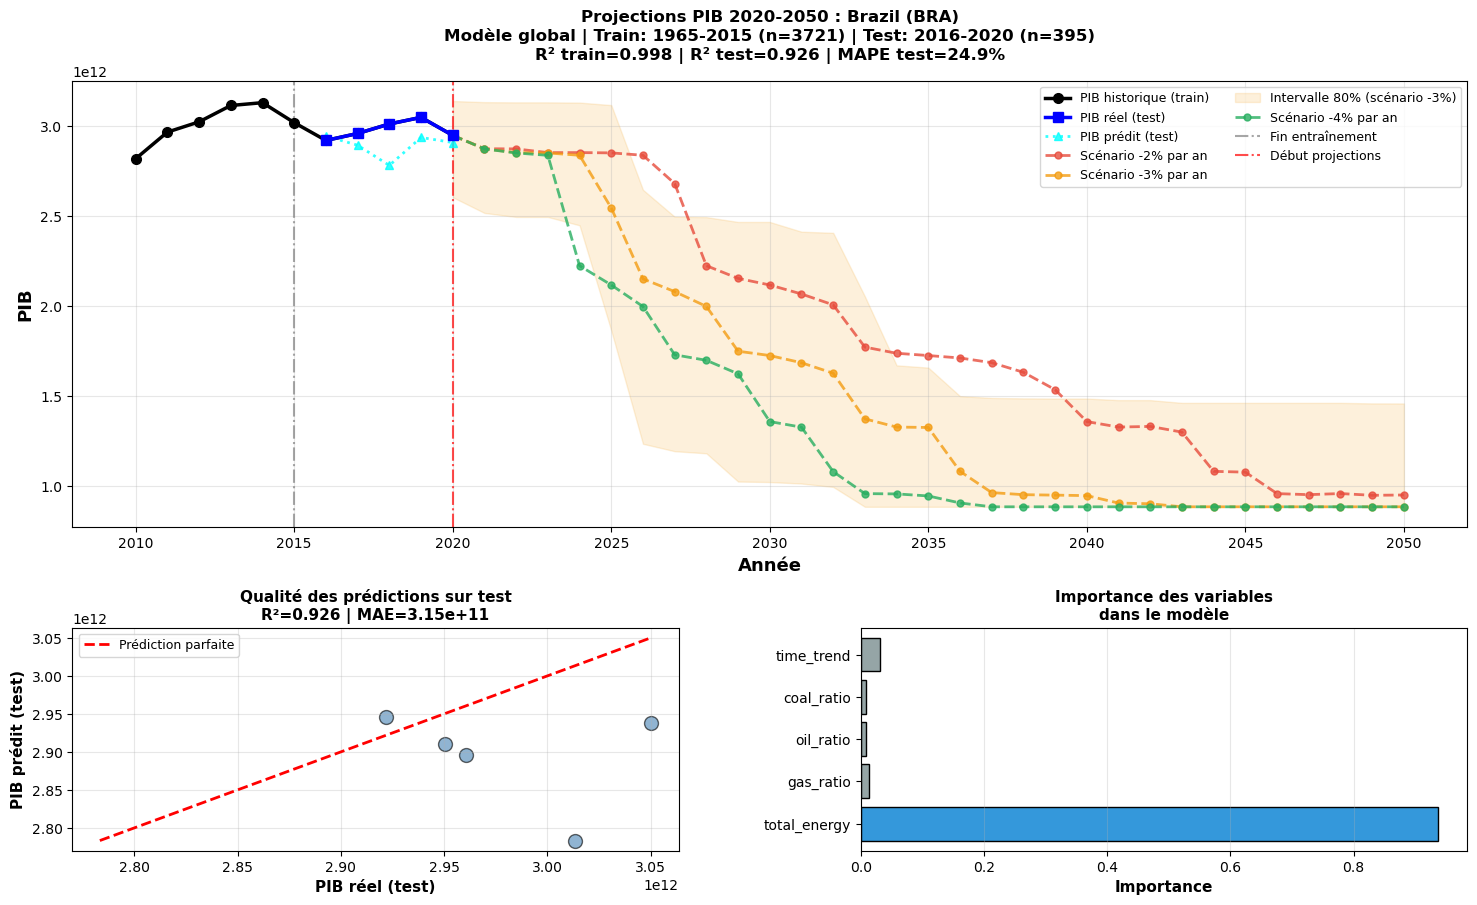

✓ Modèle global
  Train: 3721 observations (1965-2015)
  Test:  395 observations (2016-2020)
  R² train: 0.998
  R² test:  0.926
  MAE test: 3.15e+11
  MAPE test: 24.9%

Pays: France (FRA)


/tmp/ipykernel_58782/402316766.py:541: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


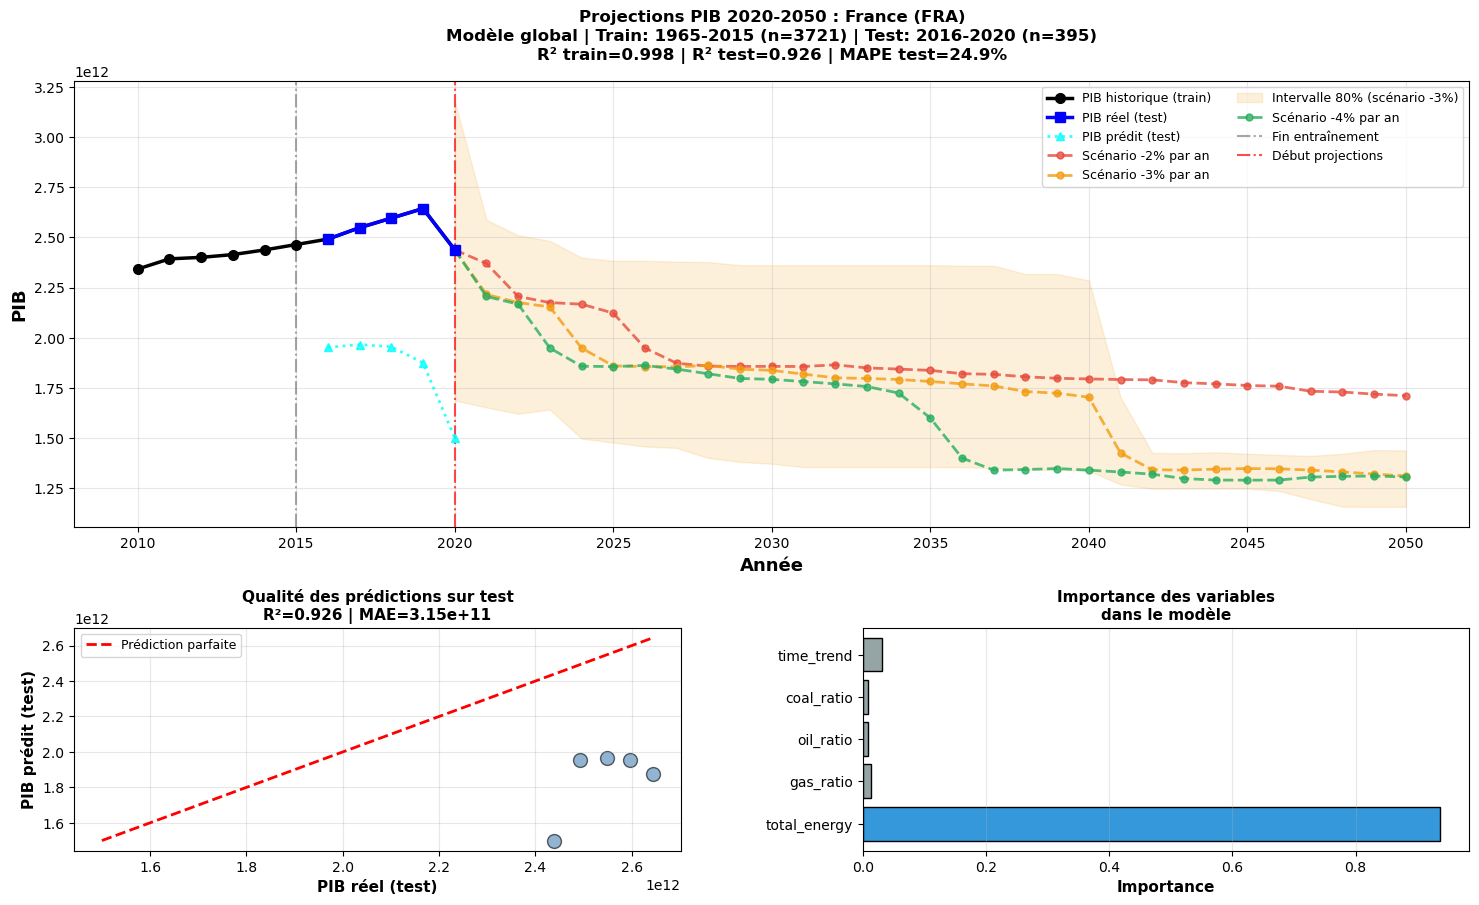

✓ Modèle global
  Train: 3721 observations (1965-2015)
  Test:  395 observations (2016-2020)
  R² train: 0.998
  R² test:  0.926
  MAE test: 3.15e+11
  MAPE test: 24.9%

Pays: United Kingdom (GBR)


/tmp/ipykernel_58782/402316766.py:541: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


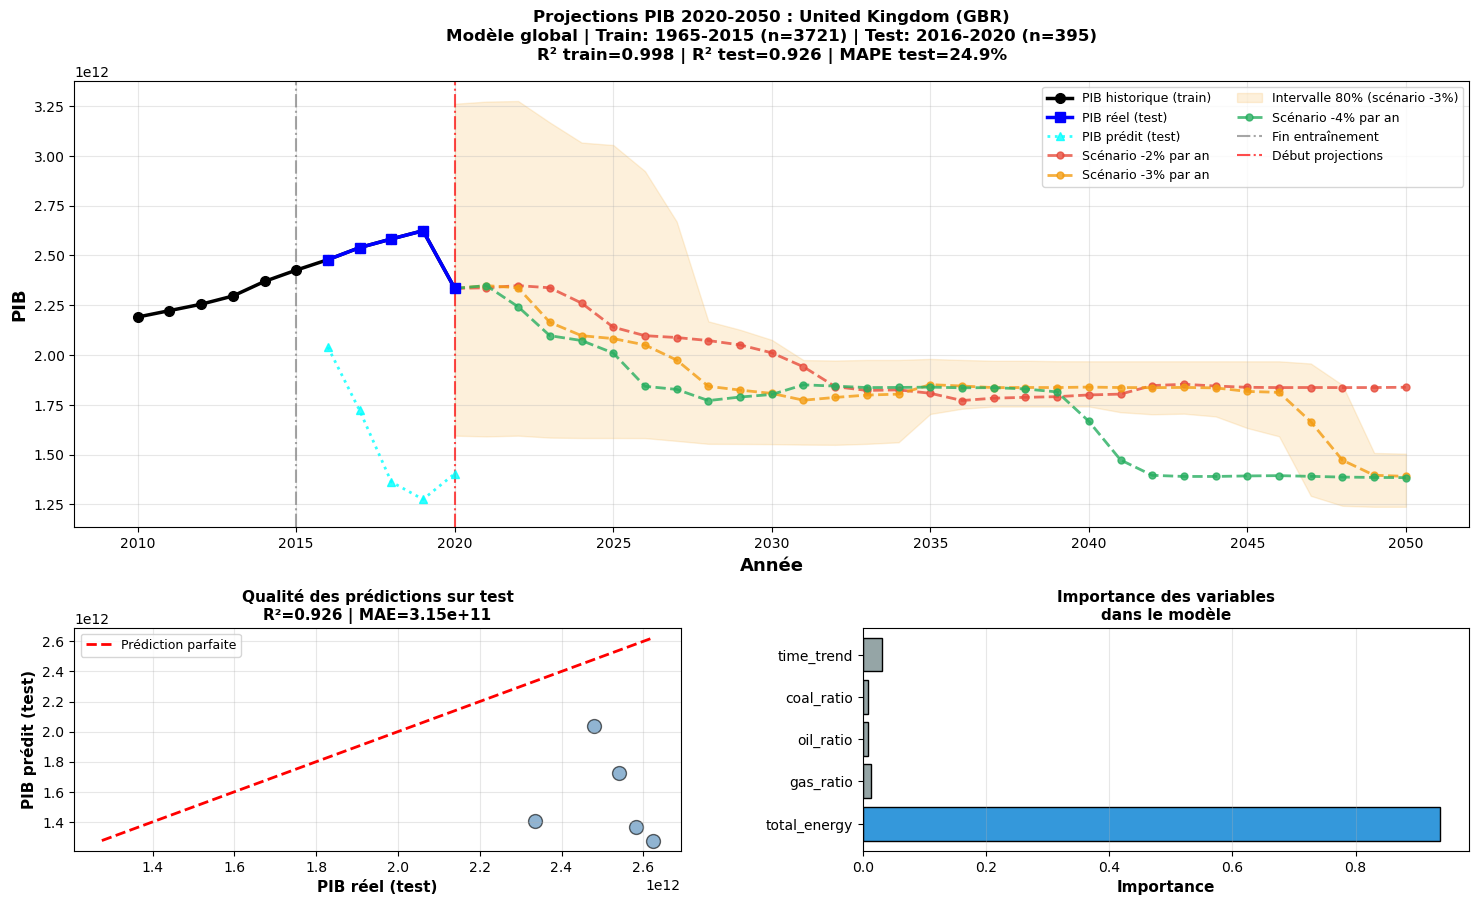

✓ Modèle global
  Train: 3721 observations (1965-2015)
  Test:  395 observations (2016-2020)
  R² train: 0.998
  R² test:  0.926
  MAE test: 3.15e+11
  MAPE test: 24.9%

FIN DES PROJECTIONS


In [1]:
import os
from dotenv import load_dotenv

from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Connexion à Neon
load_dotenv()

url = URL.create(
    drivername="postgresql+psycopg2",
    username=os.getenv("NEON_USER"),
    password=os.getenv("NEON_PASSWORD"),
    host=os.getenv("NEON_HOST"),
    port=int(os.getenv("NEON_PORT", "5432")),
    database=os.getenv("NEON_DB"),
    query={"sslmode": os.getenv("NEON_SSLMODE", "require")},
)

engine = create_engine(url, pool_pre_ping=True)

# Test connexion
test_df = pd.read_sql("SELECT now() AS now, version() AS version;", engine)
print("Connexion établie:")
print(test_df)

# Chargement des tables
fact_env = pd.read_sql(
    """
    SELECT country_key,
           year,
           coal_consumption,
           gas_consumption,
           oil_consumption
    FROM fact_energy_environment;
    """,
    engine,
)

fact_soc = pd.read_sql(
    """
    SELECT country_key,
           year,
           gdp
    FROM fact_socio_economy;
    """,
    engine,
)

dim_country = pd.read_sql(
    """
    SELECT country_key,
           country_name,
           iso_code
    FROM dim_country;
    """,
    engine,
)

# Top 10 pays par GDP en 2020
soc_2020 = fact_soc[(fact_soc["year"] == 2020) & fact_soc["gdp"].notna()]

top10_2020 = (
    soc_2020.nlargest(10, "gdp").merge(
        dim_country[["country_key", "country_name", "iso_code"]],
        on="country_key",
        how="left",
    )
)

print("\n" + "="*60)
print("Top 10 pays par PIB en 2020:")
print("="*60)
print(top10_2020[["country_name", "iso_code", "gdp"]].to_string(index=False))


def build_country_scenarios_rf(
    country_key: int,
    train_end_year: int = 2015,
    test_end_year: int = 2020,
    projection_end_year: int = 2050,
    rates=(0.02, 0.03, 0.04),
    use_global_model: bool = False,
):
    """
    Scénarios de PIB avec split train/test temporel approprié.
    
    Paramètres:
    -----------
    country_key : int
        Identifiant du pays
    train_end_year : int
        Dernière année d'entraînement (défaut: 2015)
    test_end_year : int
        Dernière année de test (défaut: 2020)
    projection_end_year : int
        Dernière année de projection (défaut: 2050)
    rates : tuple
        Taux de baisse annuelle de la consommation d'énergie fossile
    use_global_model : bool
        Si True, entraîne le modèle sur tous les pays
    
    Structure temporelle:
    --------------------
    |───── TRAIN ─────|─── TEST ───|──── PROJECTIONS ────|
    2000      2015    2016    2020  2021            2050
    
    Retourne:
    ---------
    hist : DataFrame avec colonnes ["year", "gdp"]
    test_results : DataFrame avec colonnes ["year", "gdp_real", "gdp_pred"]
    scenarios : dict {label: DataFrame ["year", "gdp_pred", "gdp_lower", "gdp_upper"]}
    model_metrics : dict avec les métriques du modèle
    """
    
    # Fusionner socio + énergie
    if use_global_model:
        df = (
            fact_soc.merge(
                fact_env[
                    [
                        "country_key",
                        "year",
                        "coal_consumption",
                        "gas_consumption",
                        "oil_consumption",
                    ]
                ],
                on=["country_key", "year"],
                how="inner",
            )
        )
    else:
        df = (
            fact_soc[fact_soc["country_key"] == country_key].merge(
                fact_env[
                    [
                        "country_key",
                        "year",
                        "coal_consumption",
                        "gas_consumption",
                        "oil_consumption",
                    ]
                ],
                on=["country_key", "year"],
                how="inner",
            )
        )

    # Nettoyer les données
    df_clean = df[
        [
            "country_key",
            "year",
            "gdp",
            "coal_consumption",
            "gas_consumption",
            "oil_consumption",
        ]
    ].dropna()

    if df_clean.empty:
        raise ValueError(f"Pas de données pour country_key={country_key}")

    df_clean = df_clean.sort_values(["country_key", "year"])

    # Créer des features
    df_clean["total_energy"] = (
        df_clean["coal_consumption"]
        + df_clean["gas_consumption"]
        + df_clean["oil_consumption"]
    )
    
    df_clean = df_clean[df_clean["total_energy"] > 0]
    
    df_clean["gas_ratio"] = df_clean["gas_consumption"] / df_clean["total_energy"]
    df_clean["oil_ratio"] = df_clean["oil_consumption"] / df_clean["total_energy"]
    df_clean["coal_ratio"] = df_clean["coal_consumption"] / df_clean["total_energy"]
    
    min_year = df_clean["year"].min()
    df_clean["time_trend"] = df_clean["year"] - min_year

    # Features pour le modèle
    if use_global_model:
        feature_cols = [
            "total_energy",
            "gas_ratio",
            "oil_ratio",
            "coal_ratio",
            "time_trend",
        ]
    else:
        feature_cols = [
            "coal_consumption",
            "gas_consumption",
            "oil_consumption",
            "time_trend",
        ]

    # ══════════════════════════════════════════════════════════════
    # SPLIT TRAIN / TEST TEMPOREL
    # ══════════════════════════════════════════════════════════════
    
    # Données d'entraînement (jusqu'à train_end_year inclus)
    train_data = df_clean[df_clean["year"] <= train_end_year].copy()
    
    # Données de test (entre train_end_year+1 et test_end_year inclus)
    test_data = df_clean[
        (df_clean["year"] > train_end_year) & 
        (df_clean["year"] <= test_end_year)
    ].copy()
    
    if train_data.empty:
        raise ValueError(f"Pas de données d'entraînement pour country_key={country_key}")
    
    X_train = train_data[feature_cols].values
    y_train = train_data["gdp"].values
    
    # Entraînement du Random Forest UNIQUEMENT sur les données train
    rf = RandomForestRegressor(
        n_estimators=500,
        random_state=42,
        min_samples_leaf=2,
        max_depth=15,
        n_jobs=-1,
    )
    rf.fit(X_train, y_train)
    
    # ══════════════════════════════════════════════════════════════
    # ÉVALUATION SUR LE SET DE TEST
    # ══════════════════════════════════════════════════════════════
    
    test_results = None
    model_metrics = {
        "n_train": len(X_train),
        "n_test": 0,
        "train_years": f"{train_data['year'].min()}-{train_data['year'].max()}",
        "test_years": "N/A",
        "feature_importance": dict(zip(feature_cols, rf.feature_importances_))
    }
    
    if not test_data.empty:
        X_test = test_data[feature_cols].values
        y_test = test_data["gdp"].values
        
        # Prédictions sur le test
        y_pred_test = rf.predict(X_test)
        
        # Métriques de performance
        r2_test = r2_score(y_test, y_pred_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
        
        model_metrics.update({
            "n_test": len(X_test),
            "test_years": f"{test_data['year'].min()}-{test_data['year'].max()}",
            "r2_test": r2_test,
            "mae_test": mae_test,
            "rmse_test": rmse_test,
            "mape_test": mape_test,
        })
        
        # Préparer le DataFrame des résultats test pour visualisation
        if use_global_model:
            test_results = test_data[test_data["country_key"] == country_key][
                ["year", "gdp"]
            ].copy()
            test_results["gdp_pred"] = rf.predict(
                test_data[test_data["country_key"] == country_key][feature_cols].values
            )
        else:
            test_results = test_data[["year", "gdp"]].copy()
            test_results["gdp_pred"] = y_pred_test
    
    # Score sur le train (pour comparaison - attention à l'overfitting!)
    y_pred_train = rf.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    model_metrics["r2_train"] = r2_train

    # ══════════════════════════════════════════════════════════════
    # FONCTION DE PRÉDICTION AVEC INTERVALLES
    # ══════════════════════════════════════════════════════════════
    
    def predict_with_intervals(features_list):
        predictions = np.array([tree.predict([features_list])[0] for tree in rf.estimators_])
        mean_pred = predictions.mean()
        lower = np.percentile(predictions, 10)
        upper = np.percentile(predictions, 90)
        return mean_pred, lower, upper

    # ══════════════════════════════════════════════════════════════
    # RÉCUPÉRER LES VALEURS DE RÉFÉRENCE POUR LES PROJECTIONS
    # ══════════════════════════════════════════════════════════════
    
    # On part de test_end_year (ex: 2020) pour les projections
    if use_global_model:
        row_ref = df_clean[
            (df_clean["country_key"] == country_key) & 
            (df_clean["year"] == test_end_year)
        ]
    else:
        row_ref = df_clean[df_clean["year"] == test_end_year]
    
    if row_ref.empty:
        raise ValueError(
            f"Pas de données pour {test_end_year} (country_key={country_key})"
        )
    
    row_ref = row_ref.iloc[0]
    
    coal_ref = row_ref["coal_consumption"]
    gas_ref = row_ref["gas_consumption"]
    oil_ref = row_ref["oil_consumption"]
    gdp_real_ref = row_ref["gdp"]
    
    total_ref = coal_ref + gas_ref + oil_ref
    gas_ratio_ref = gas_ref / total_ref
    oil_ratio_ref = oil_ref / total_ref
    coal_ratio_ref = coal_ref / total_ref
    
    time_ref = test_end_year - min_year

    # Calculer l'offset pour aligner sur le PIB réel de test_end_year
    if use_global_model:
        features_ref = [total_ref, gas_ratio_ref, oil_ratio_ref, coal_ratio_ref, time_ref]
    else:
        features_ref = [coal_ref, gas_ref, oil_ref, time_ref]
    
    gdp_pred_ref, _, _ = predict_with_intervals(features_ref)
    offset = gdp_real_ref - gdp_pred_ref

    # ══════════════════════════════════════════════════════════════
    # CONSTRUIRE LES SCÉNARIOS DE PROJECTION
    # ══════════════════════════════════════════════════════════════
    
    years = list(range(test_end_year, projection_end_year + 1))
    scenarios = {}

    for rate in rates:
        label = f"-{int(rate * 100)}% par an"
        coal = coal_ref
        gas = gas_ref
        oil = oil_ref

        rows = []

        for i, year in enumerate(years):
            if i > 0:
                coal *= (1 - rate)
                gas *= (1 - rate)
                oil *= (1 - rate)

            total = coal + gas + oil
            gas_ratio = gas / total if total > 0 else gas_ratio_ref
            oil_ratio = oil / total if total > 0 else oil_ratio_ref
            coal_ratio = coal / total if total > 0 else coal_ratio_ref
            
            time_idx = year - min_year

            if use_global_model:
                features = [total, gas_ratio, oil_ratio, coal_ratio, time_idx]
            else:
                features = [coal, gas, oil, time_idx]

            gdp_pred, gdp_lower, gdp_upper = predict_with_intervals(features)
            
            gdp_pred_aligned = gdp_pred + offset
            gdp_lower_aligned = gdp_lower + offset
            gdp_upper_aligned = gdp_upper + offset
            
            # Contrainte: PIB >= 30% du PIB de référence
            min_gdp = gdp_real_ref * 0.30
            gdp_pred_aligned = max(gdp_pred_aligned, min_gdp)
            gdp_lower_aligned = max(gdp_lower_aligned, min_gdp)
            gdp_upper_aligned = max(gdp_upper_aligned, min_gdp)

            rows.append({
                "year": year,
                "gdp_pred": gdp_pred_aligned,
                "gdp_lower": gdp_lower_aligned,
                "gdp_upper": gdp_upper_aligned,
            })

        scenarios[label] = pd.DataFrame(rows)

    # Historique pour visualisation (2010 → test_end_year)
    if use_global_model:
        hist = df_clean[
            (df_clean["country_key"] == country_key)
            & (df_clean["year"] >= 2010)
            & (df_clean["year"] <= test_end_year)
        ][["year", "gdp"]].copy()
    else:
        hist = df_clean[
            (df_clean["year"] >= 2010) & (df_clean["year"] <= test_end_year)
        ][["year", "gdp"]].copy()

    return hist, test_results, scenarios, model_metrics


def plot_country_scenarios_rf(country_key, use_global_model=False):
    """Visualise les scénarios avec validation sur données test"""
    
    row_country = dim_country[dim_country["country_key"] == country_key].iloc[0]
    name = row_country["country_name"]
    iso = row_country["iso_code"]

    hist, test_results, scenarios, metrics = build_country_scenarios_rf(
        country_key, 
        train_end_year=2015,
        test_end_year=2020,
        projection_end_year=2050,
        use_global_model=use_global_model
    )

    fig = plt.figure(figsize=(18, 10))
    gs = fig.add_gridspec(2, 2, height_ratios=[2, 1], hspace=0.3, wspace=0.3)
    
    ax1 = fig.add_subplot(gs[0, :])  # Graphique principal (toute la largeur)
    ax2 = fig.add_subplot(gs[1, 0])  # Validation test
    ax3 = fig.add_subplot(gs[1, 1])  # Importances

    # ════════════════════════════════════════════════════════════
    # GRAPHIQUE PRINCIPAL : Historique + Test + Projections
    # ════════════════════════════════════════════════════════════
    
    # Historique
    ax1.plot(hist["year"], hist["gdp"], marker="o", linewidth=2.5, 
             label="PIB historique (train)", color="black", markersize=7, zorder=5)
    
    # Période de test
    if test_results is not None and not test_results.empty:
        ax1.plot(test_results["year"], test_results["gdp"], marker="s", 
                linewidth=2.5, label="PIB réel (test)", color="blue", 
                markersize=7, zorder=5)
        ax1.plot(test_results["year"], test_results["gdp_pred"], marker="^", 
                linewidth=2, linestyle=":", label="PIB prédit (test)", 
                color="cyan", markersize=6, alpha=0.8, zorder=4)

    # Scénarios de projection
    colors = ["#e74c3c", "#f39c12", "#27ae60"]
    for (label, sdf), color in zip(scenarios.items(), colors):
        ax1.plot(
            sdf["year"],
            sdf["gdp_pred"],
            marker="o",
            linestyle="--",
            linewidth=2,
            label=f"Scénario {label}",
            color=color,
            alpha=0.8,
            markersize=5,
        )
        # Intervalle de confiance pour -3%
        if "-3%" in label:
            ax1.fill_between(
                sdf["year"],
                sdf["gdp_lower"],
                sdf["gdp_upper"],
                alpha=0.15,
                color=color,
                label="Intervalle 80% (scénario -3%)"
            )
    
    # Ligne verticale de séparation
    ax1.axvline(x=2015, color='gray', linestyle='-.', linewidth=1.5, 
                alpha=0.7, label="Fin entraînement")
    ax1.axvline(x=2020, color='red', linestyle='-.', linewidth=1.5, 
                alpha=0.7, label="Début projections")

    ax1.set_xlabel("Année", fontsize=13, fontweight='bold')
    ax1.set_ylabel("PIB", fontsize=13, fontweight='bold')
    
    # Titre avec métriques
    title_text = f"Projections PIB 2020-2050 : {name} ({iso})\n"
    title_text += f"Modèle {'global' if use_global_model else 'pays unique'} | "
    title_text += f"Train: {metrics['train_years']} (n={metrics['n_train']})"
    
    if metrics['n_test'] > 0:
        title_text += f" | Test: {metrics['test_years']} (n={metrics['n_test']})\n"
        title_text += f"R² train={metrics['r2_train']:.3f} | "
        title_text += f"R² test={metrics['r2_test']:.3f} | "
        title_text += f"MAPE test={metrics['mape_test']:.1f}%"
    
    ax1.set_title(title_text, fontsize=12, fontweight="bold", pad=15)
    ax1.legend(loc="best", fontsize=9, ncol=2)
    ax1.grid(True, alpha=0.3)

    # ════════════════════════════════════════════════════════════
    # GRAPHIQUE 2 : Validation sur période test
    # ════════════════════════════════════════════════════════════
    
    if test_results is not None and not test_results.empty:
        ax2.scatter(test_results["gdp"], test_results["gdp_pred"], 
                   s=100, alpha=0.6, color='steelblue', edgecolors='black')
        
        # Ligne de référence parfaite
        min_val = min(test_results["gdp"].min(), test_results["gdp_pred"].min())
        max_val = max(test_results["gdp"].max(), test_results["gdp_pred"].max())
        ax2.plot([min_val, max_val], [min_val, max_val], 'r--', 
                linewidth=2, label='Prédiction parfaite')
        
        ax2.set_xlabel('PIB réel (test)', fontsize=11, fontweight='bold')
        ax2.set_ylabel('PIB prédit (test)', fontsize=11, fontweight='bold')
        ax2.set_title(
            f"Qualité des prédictions sur test\n"
            f"R²={metrics['r2_test']:.3f} | MAE={metrics['mae_test']:.2e}",
            fontsize=11, fontweight='bold'
        )
        ax2.legend(fontsize=9)
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'Pas de données test disponibles', 
                ha='center', va='center', fontsize=12, 
                transform=ax2.transAxes)
        ax2.set_xticks([])
        ax2.set_yticks([])

    # ════════════════════════════════════════════════════════════
    # GRAPHIQUE 3 : Importance des variables
    # ════════════════════════════════════════════════════════════
    
    features = list(metrics['feature_importance'].keys())
    importances = list(metrics['feature_importance'].values())
    
    colors_imp = ['#3498db' if imp == max(importances) else '#95a5a6' 
                  for imp in importances]
    
    ax3.barh(features, importances, color=colors_imp, edgecolor='black')
    ax3.set_xlabel('Importance', fontsize=11, fontweight='bold')
    ax3.set_title('Importance des variables\ndans le modèle', 
                 fontsize=11, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='x')

    plt.tight_layout()
    plt.show()
    
    return metrics


# ══════════════════════════════════════════════════════════════
# EXÉCUTION POUR LES TOP 10
# ══════════════════════════════════════════════════════════════

print("\n" + "="*60)
print("GÉNÉRATION DES PROJECTIONS PIB 2020-2050")
print("avec validation train/test")
print("="*60)

for _, row in top10_2020.iterrows():
    print(f"\n{'='*60}")
    print(f"Pays: {row['country_name']} ({row['iso_code']})")
    print(f"{'='*60}")
    
    try:
        metrics = plot_country_scenarios_rf(row["country_key"], use_global_model=True)
        
        print(f"✓ Modèle global")
        print(f"  Train: {metrics['n_train']} observations ({metrics['train_years']})")
        print(f"  Test:  {metrics['n_test']} observations ({metrics['test_years']})")
        print(f"  R² train: {metrics['r2_train']:.3f}")
        if metrics['n_test'] > 0:
            print(f"  R² test:  {metrics['r2_test']:.3f}")
            print(f"  MAE test: {metrics['mae_test']:.2e}")
            print(f"  MAPE test: {metrics['mape_test']:.1f}%")
            
            # Alerte si overfitting
            if metrics['r2_train'] - metrics['r2_test'] > 0.15:
                print(f"  ⚠️  ATTENTION: Possible overfitting (écart R² = {metrics['r2_train'] - metrics['r2_test']:.3f})")
        
    except Exception as e:
        print(f"⚠ Erreur modèle global: {e}")
        try:
            metrics = plot_country_scenarios_rf(row["country_key"], use_global_model=False)
            print(f"✓ Modèle pays unique - R² test = {metrics.get('r2_test', 'N/A')}")
        except Exception as e2:
            print(f"✗ Erreur: {e2}")

print("\n" + "="*60)
print("FIN DES PROJECTIONS")
print("="*60)